# Complex numbers and trigonometry

$$z = x+iy = r e^{i \theta}= r (\cos \theta + i \sin \theta)$$

Three elementary trigometric functions are:

$$ \cos \theta = \frac{e^{i\theta} + e^{-i \theta}}{2}, \ \ \ \sin \theta = \frac{e^{i \theta} - e^{-i \theta}}{2i}, \ \ \tan \theta = \frac{y}{x}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *

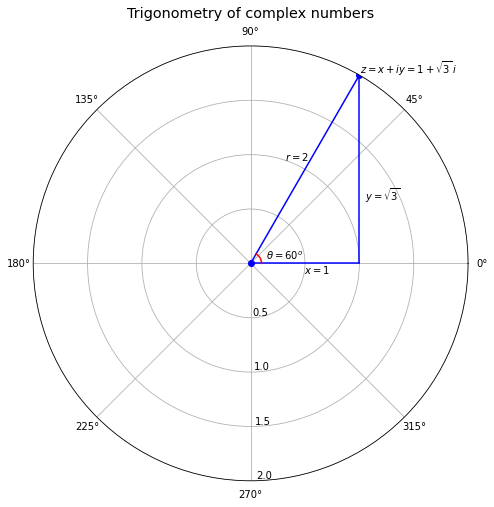

In [9]:
pi = np.pi
zeros = np.zeros
ones = np.ones

r = 2
theta = pi/3
x = r * np.cos(theta)
x_range = np.linspace(0, x, 1000)
theta_range = np.linspace(0, theta, 1000)

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

ax.plot((0, theta), (0, r), marker='o', color='b')
ax.plot(zeros(x_range.shape), x_range, color='b')
ax.plot(theta_range, x/np.cos(theta_range), color='b')
ax.plot(theta_range, ones(theta_range.shape)*0.1, color='r')
ax.margins(0)

ax.set_title('Trigonometry of complex numbers', va='bottom', fontsize='x-large')

ax.set_rmax(2)
ax.set_rticks((0.5, 1, 1.5, 2))
ax.set_rlabel_position(-88.5)

ax.text(theta, r+0.01 , r'$z = x + iy = 1 + \sqrt{3}\, i$')   # Label z
ax.text(theta+0.2, 1 , '$r = 2$')                             # Label r
ax.text(0-0.2, 0.5, '$x = 1$')                            # Label x
ax.text(0.5, 1.2, r'$y = \sqrt{3}$')                      # Label y
ax.text(0.25, 0.15, r'$\theta = 60^o$')                   # Label θ

ax.grid(True)
plt.show()


Consider a second-order linear difference equation
$$x_{n+2} = c_1 x_{n+1} + c_2 x_n$$
whose __characteristic polynomial__ is
$$z^2 - c_1 z - c_2 = 0  \tag{1}$$
A solution is a sequence $\{ x_n \}_{n=0}^\infty$ that satisfies the difference equation. 

Based on De Moivre's Theorem, we have
$$z^n = (x + iy)^n = (r e^{i \theta})^n = r^n (\cos n \theta + i \sin n \theta) $$

Now, let __construct__ a sequence with

* $z = re^{i \theta}, \bar{z} = re^{-i \theta}$
* $\alpha = p e^{i w}, \bar{\alpha} = pe^{-i w}$
* for each element of a sequence of integers $n = 0, 1, 2, \cdots, $

we can have:

\begin{align}
x_n & = \alpha z^n + \bar{\alpha} \bar{z}^n \\
 & = p e^{i w} (r e^{i \theta})^n + p e^{-i w}(r e^{-i \theta})^n \\
 & = 2p r^n \cos (w + n \theta) \tag{2}
\end{align}

For equation (1), we know:

* the roots $z_1 z_2$ of the characteristic polynomial of the difference equation form a complex conjugate pair
* the values $x_0,x_1$ are given initial conditions

Based on equation (2), we can have:
$$x_0 = 2p \cos w, \ \ x_1 = 2 p r \cos (w + \theta)$$
This gives us
$$\frac{x_1}{x_0} = \frac{r \cos (w + \theta)}{\cos w}$$

In [11]:
# set parameters
r = 0.9
theta = np.pi/4 
x0 = 4
x1 = 2 * r * sqrt(2)

# define symbols
w, p = symbols('w p', real=True)

# solve for w
eq1 = Eq(x1/x0 - r * cos(w + theta)/cos(w), 0)
w = nsolve(eq1, w, 0)
w = np.float(w)

print(f'w = {w: 1.3f}')

eq2 = Eq(x0 - 2 * p * cos(w), 0)
p = nsolve(eq2, p, 0)

p = np.float(p)
print(f'p = {p:1.3f}')


w =  0.000
p = 2.000
<ipython-input-11-f6ac49c517b3>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  w = np.float(w)
<ipython-input-11-f6ac49c517b3>:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = np.float(p)


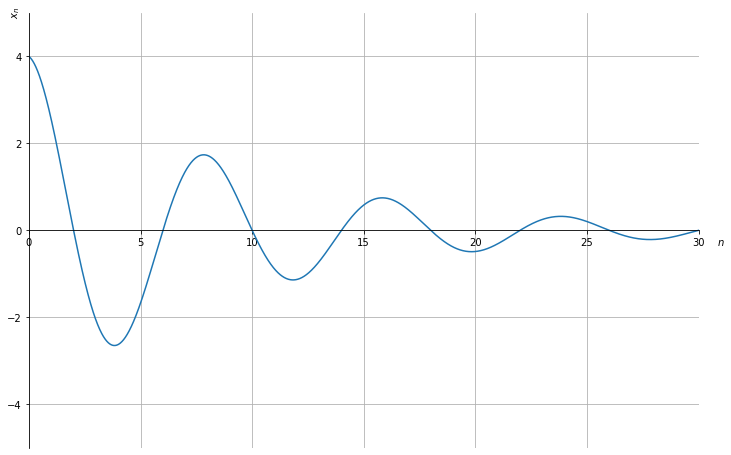

In [19]:
max_n = 30
n = np.arange(0, max_n+1, 0.01)

x = lambda n : 2 * p * r**n * np.cos(w + n * theta)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(n, x(n))
ax.set(xlim=(0, max_n), ylim=(-5, 5), xlabel='$n$', ylabel='$x_n$')

ax.spines['bottom'].set_position('center') # spines are the frame lines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')

ticklab = ax.xaxis.get_ticklabels()[0] # Set x-label position
trans = ticklab.get_transform()
ax.xaxis.set_label_coords(31, 0, transform=trans)

ticklab = ax.yaxis.get_ticklabels()[0] # Set y-label position
trans = ticklab.get_transform()
ax.yaxis.set_label_coords(0, 5, transform=trans)

ax.grid()
plt.show()


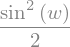

In [20]:
init_printing()

w = Symbol('w')
integrate(cos(w) * sin(w), w)

In [22]:
integrate(cos(w) * sin(w), (w, -np.pi, np.pi))

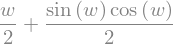

In [23]:
integrate(cos(w)**2)

In [25]:
integrate(cos(w)**2, (w, -np.pi, np.pi))

## References

If you are not familiar with difference equations, please read the notes by [Frank King](https://www.cl.cam.ac.uk/teaching/2003/Probability/prob07.pdf)